# Sample Name

How to use Template:
    i.  Change file Address
    ii. Set 'truncate' True if the initial data ranges from 0 to Bmax

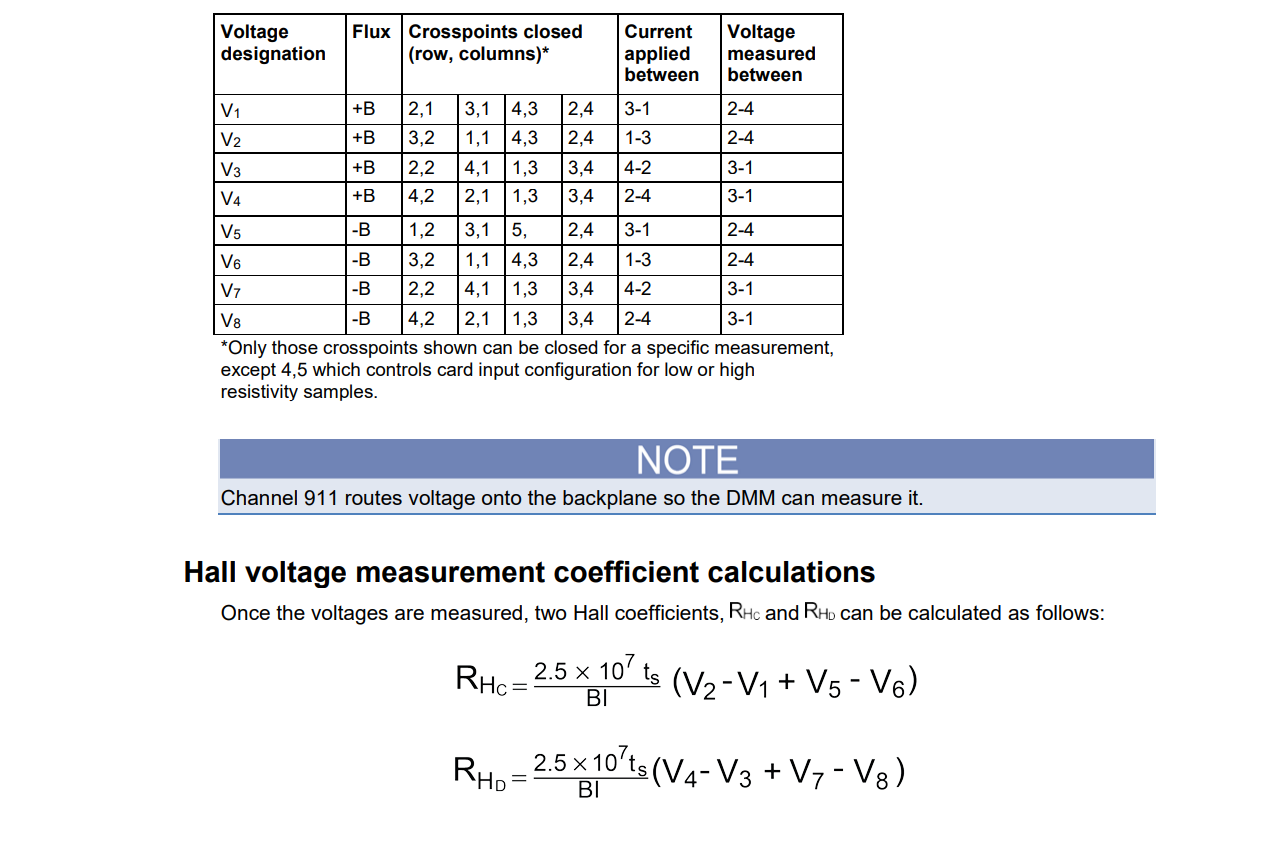

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

In [2]:
truncate = False # True it contains data from O to Bmax
path = r"C:\\users\\Admin\\Desktop\\Analysis\\Plots\\LCMO_PLD2\\HALL"
filename = 'LCMO_PLD2_150K_HALL_+5T_to_-5T.csv'
df = pd.read_csv(os.path.join(path, filename), names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value','multiplier'])
df


,I,B,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.000001,49999.647266,149.943265,107271.75620,-156750.75336,-126995.39915,142776.33971,-0.003811,1000000.0
1,0.000001,49000.365234,149.807124,108032.27122,-157506.76695,-127616.95219,146104.13733,-0.003774,1000000.0
2,0.000001,48000.050391,149.770216,109037.16741,-158809.46445,-128388.76961,148777.91150,-0.004032,1000000.0
3,0.000001,47000.595117,149.773612,109754.66994,-159596.79825,-128646.11810,150003.50895,-0.004174,1000000.0
4,0.000001,46000.490430,149.789535,110648.72861,-160399.07651,-128431.57117,150785.28588,-0.004181,1000000.0
...,...,...,...,...,...,...,...,...,...
197,0.000001,46000.299609,149.999408,114671.52867,-160657.80620,-133812.80883,150961.35809,-0.004234,1000000.0
198,0.000001,47000.435156,149.999868,113783.57631,-159679.82491,-133704.98476,149999.05112,-0.003942,1000000.0
199,0.000001,48000.472656,149.998945,112876.54031,-158840.59236,-133340.65748,149031.66828,-0.003961,1000000.0
200,0.000001,49000.425000,149.999068,111972.61152,-157741.84498,-132098.43254,147016.34115,-0.003941,1000000.0


### Converting B to integer B

In [3]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B','B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [4]:

df.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.000001,49999.647266,50000,149.943265,107271.75620,-156750.75336,-126995.39915,142776.33971,-0.003811,1000000.0
1,0.000001,49000.365234,49000,149.807124,108032.27122,-157506.76695,-127616.95219,146104.13733,-0.003774,1000000.0
2,0.000001,48000.050391,48000,149.770216,109037.16741,-158809.46445,-128388.76961,148777.91150,-0.004032,1000000.0
3,0.000001,47000.595117,47000,149.773612,109754.66994,-159596.79825,-128646.11810,150003.50895,-0.004174,1000000.0
4,0.000001,46000.490430,46000,149.789535,110648.72861,-160399.07651,-128431.57117,150785.28588,-0.004181,1000000.0


In [5]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

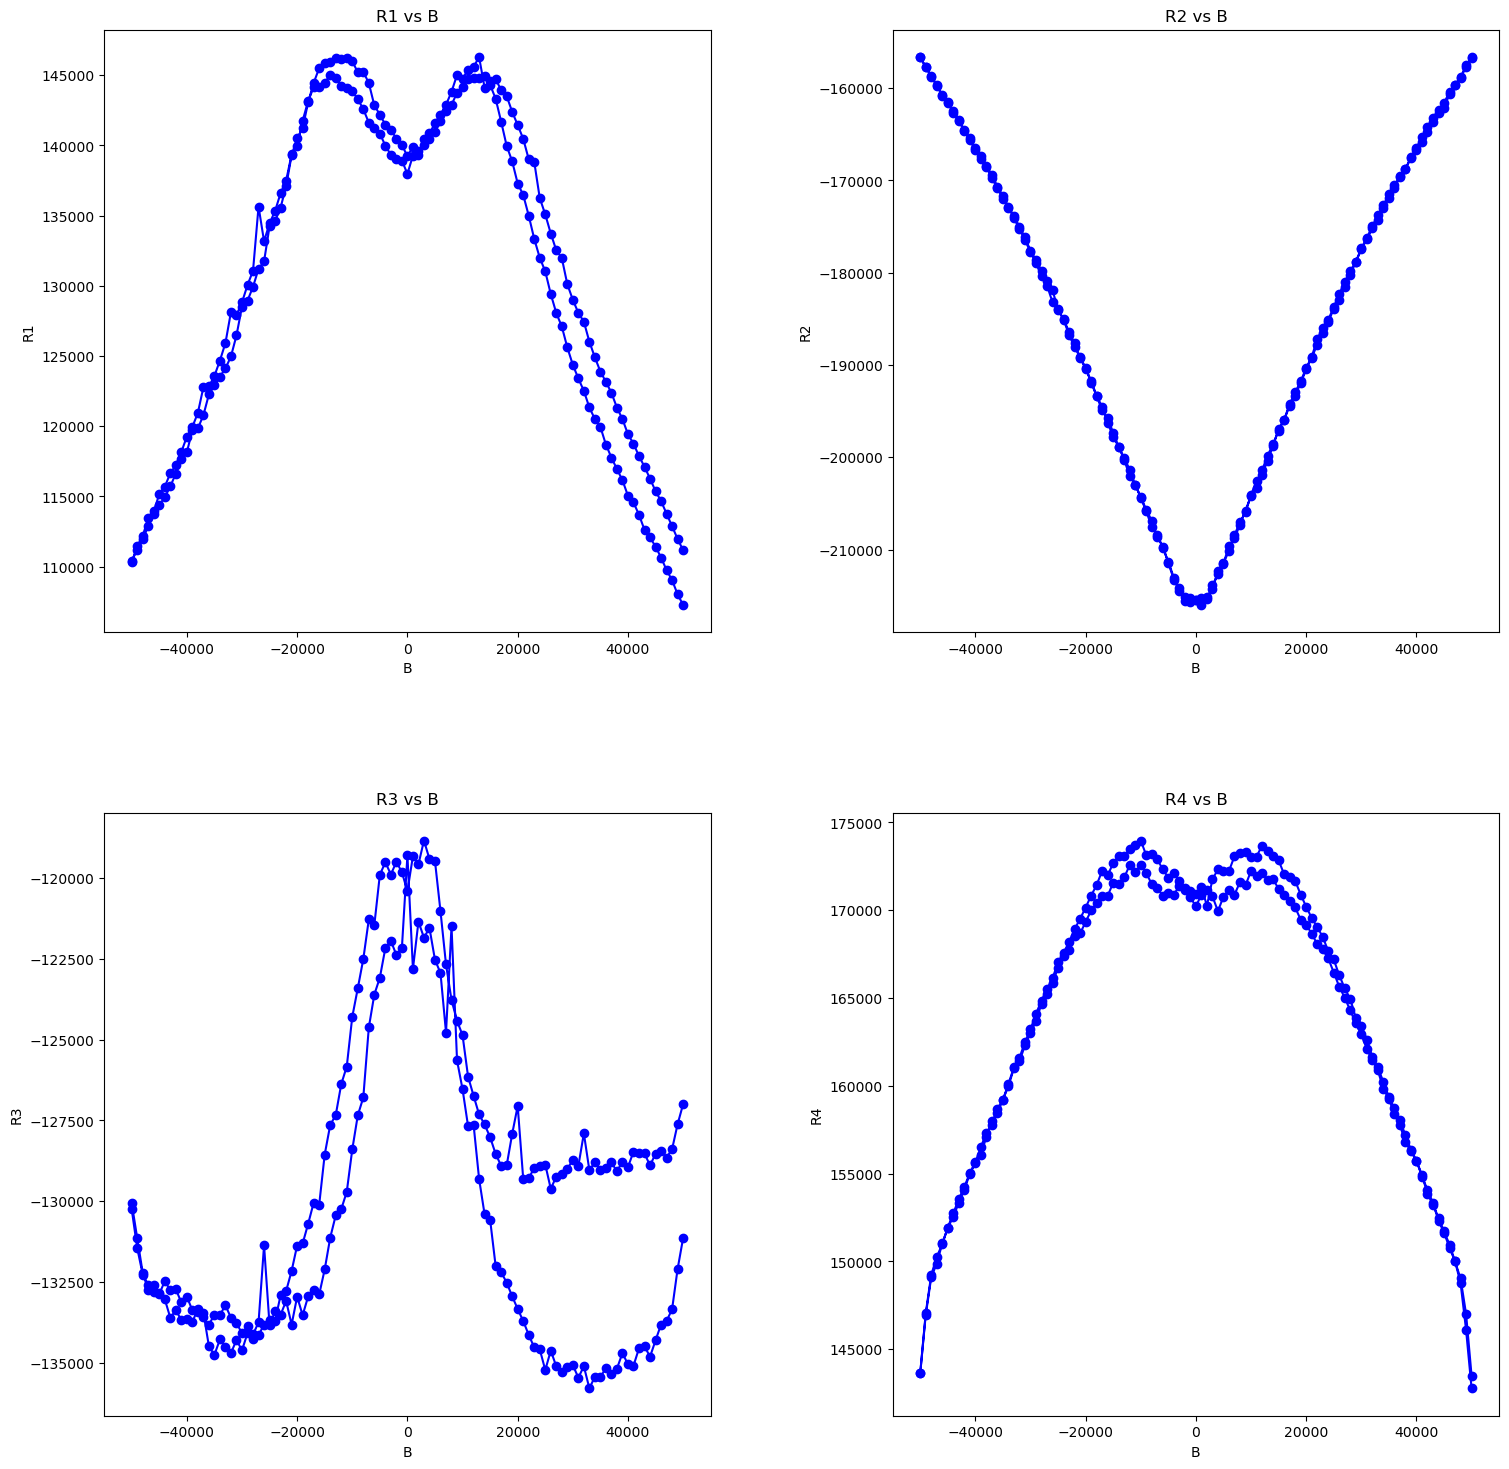

In [6]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

### Truncating intial data (0 to 1 T)

In [7]:
if(truncate):
    B_max = max(df['B_int'])
    B_max_first_idx = 0
    for i in range(len(df)):
        if df.iloc[i].B_int == B_max:
            B_max_first_idx = i
            break
    print(B_max_first_idx)

    df = df.iloc[B_max_first_idx+1:].copy()
    df.reset_index(inplace = True, drop = True) # resetting index

In [8]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

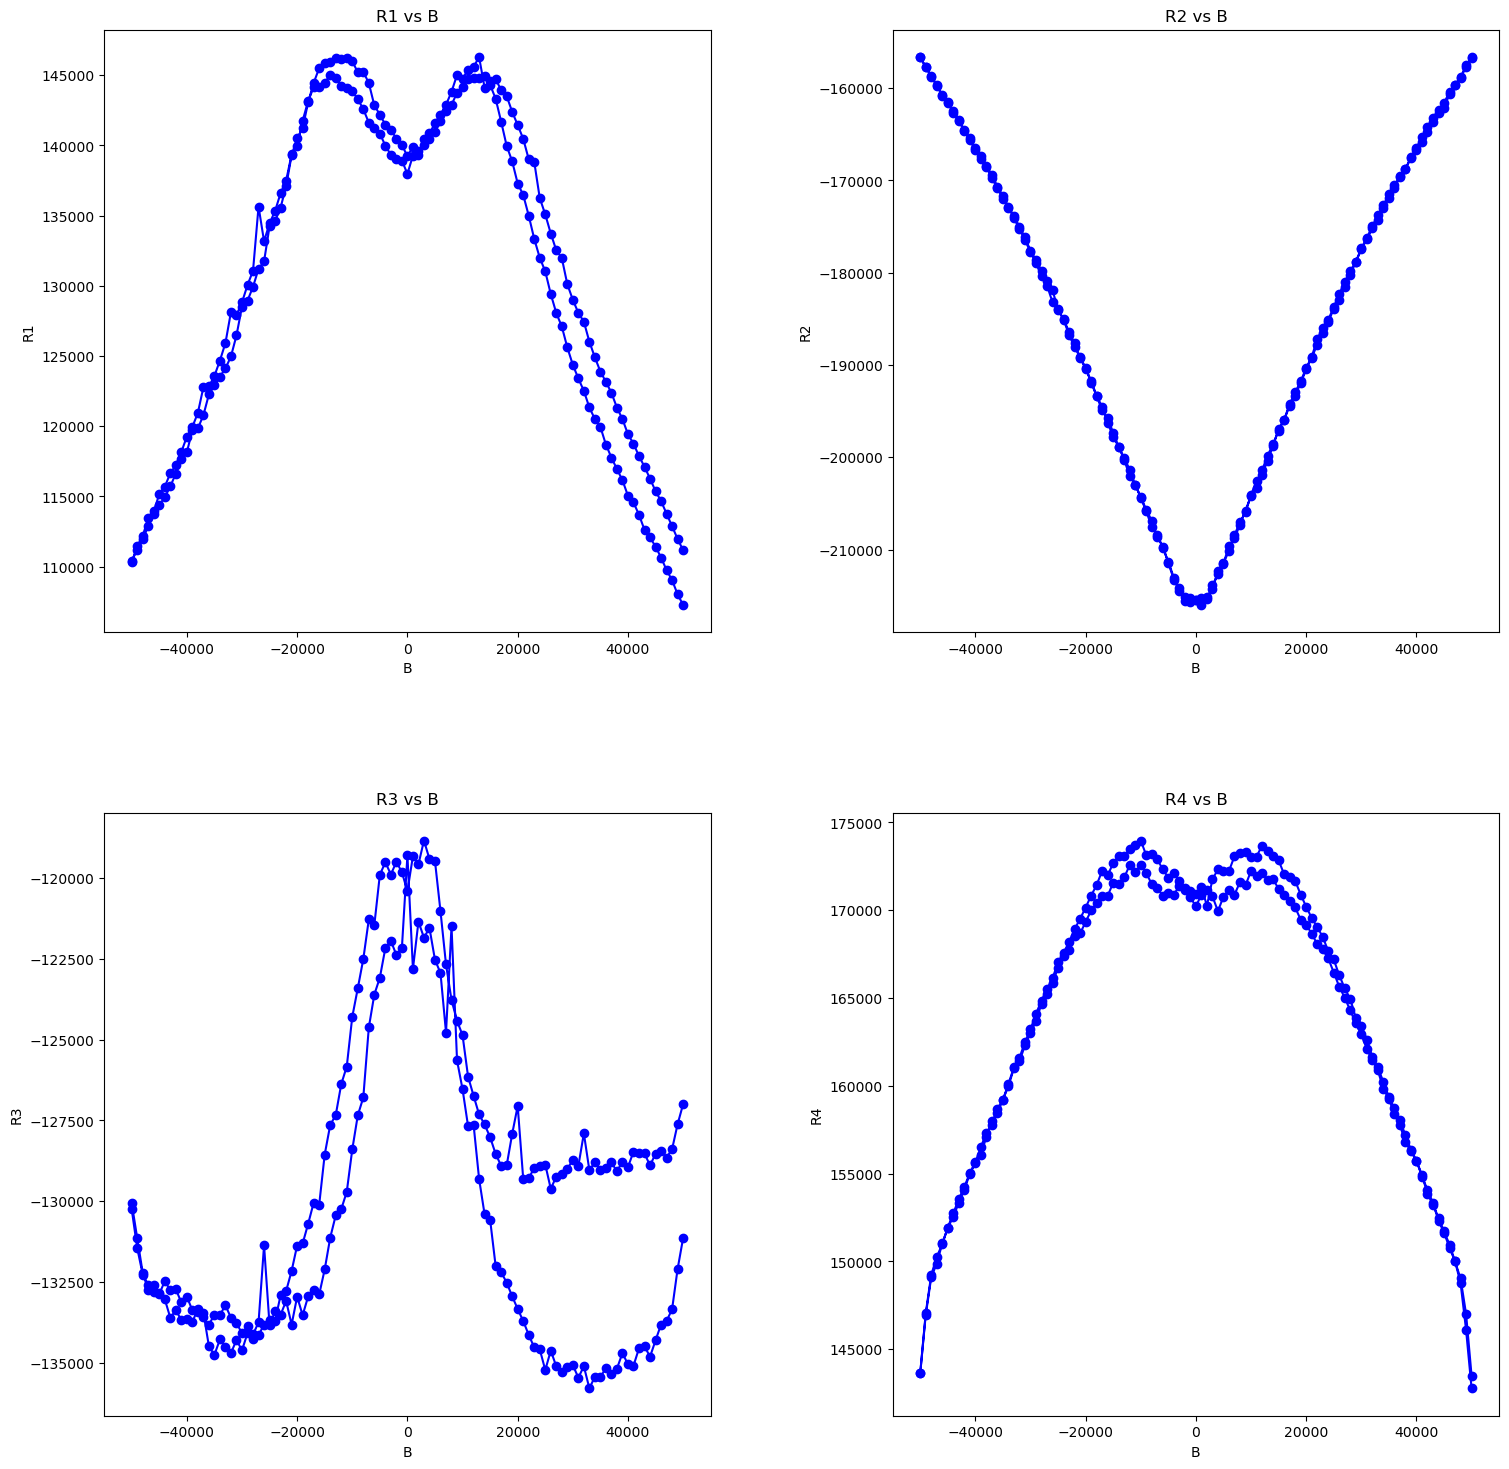

In [9]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()


## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [10]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

50000 -50000


In [11]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

100

In [12]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [13]:
df_dec.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.000001,49999.647266,50000,149.943265,107271.75620,-156750.75336,-126995.39915,142776.33971,-0.003811,1000000.0
1,0.000001,49000.365234,49000,149.807124,108032.27122,-157506.76695,-127616.95219,146104.13733,-0.003774,1000000.0
2,0.000001,48000.050391,48000,149.770216,109037.16741,-158809.46445,-128388.76961,148777.91150,-0.004032,1000000.0
3,0.000001,47000.595117,47000,149.773612,109754.66994,-159596.79825,-128646.11810,150003.50895,-0.004174,1000000.0
4,0.000001,46000.490430,46000,149.789535,110648.72861,-160399.07651,-128431.57117,150785.28588,-0.004181,1000000.0


In [14]:
df_inc.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
101,0.000001,-50000.615430,-50000,149.997459,110434.24426,-156668.05962,-130063.71652,143625.31212,-0.003888,1000000.0
102,0.000001,-49000.493555,-49000,149.995986,111168.29427,-157663.18914,-131137.74133,146942.41290,-0.003891,1000000.0
103,0.000001,-48000.591016,-48000,149.997627,111985.61538,-158634.14146,-132220.85719,149095.36534,-0.004023,1000000.0
104,0.000001,-47000.604492,-47000,149.999207,112871.09687,-159642.91458,-132744.61767,149878.42310,-0.003881,1000000.0
105,0.000001,-46000.240039,-46000,149.998082,113745.79701,-160694.56030,-132596.05953,151027.12976,-0.004202,1000000.0


In [15]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [16]:
data_dec = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data_dec = data_dec[data_dec['B_int_x'] == -1*data_dec['B_int_y']] # selecting 
data_dec = data_dec[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_dec.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data_dec.reset_index(inplace = True, drop = True) # resetting index
data_dec.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.000001,50000,149.943265,107271.75620,-156750.75336,-126995.39915,142776.33971,110434.24426,-156668.05962,-130063.71652,143625.31212,1000000.0
1,0.000001,49000,149.807124,108032.27122,-157506.76695,-127616.95219,146104.13733,111168.29427,-157663.18914,-131137.74133,146942.41290,1000000.0
2,0.000001,48000,149.770216,109037.16741,-158809.46445,-128388.76961,148777.91150,111985.61538,-158634.14146,-132220.85719,149095.36534,1000000.0
3,0.000001,47000,149.773612,109754.66994,-159596.79825,-128646.11810,150003.50895,112871.09687,-159642.91458,-132744.61767,149878.42310,1000000.0
4,0.000001,46000,149.789535,110648.72861,-160399.07651,-128431.57117,150785.28588,113745.79701,-160694.56030,-132596.05953,151027.12976,1000000.0


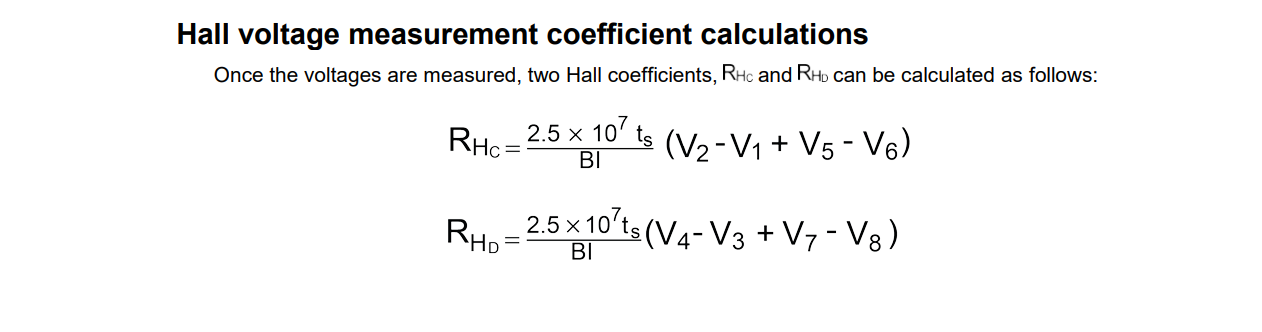
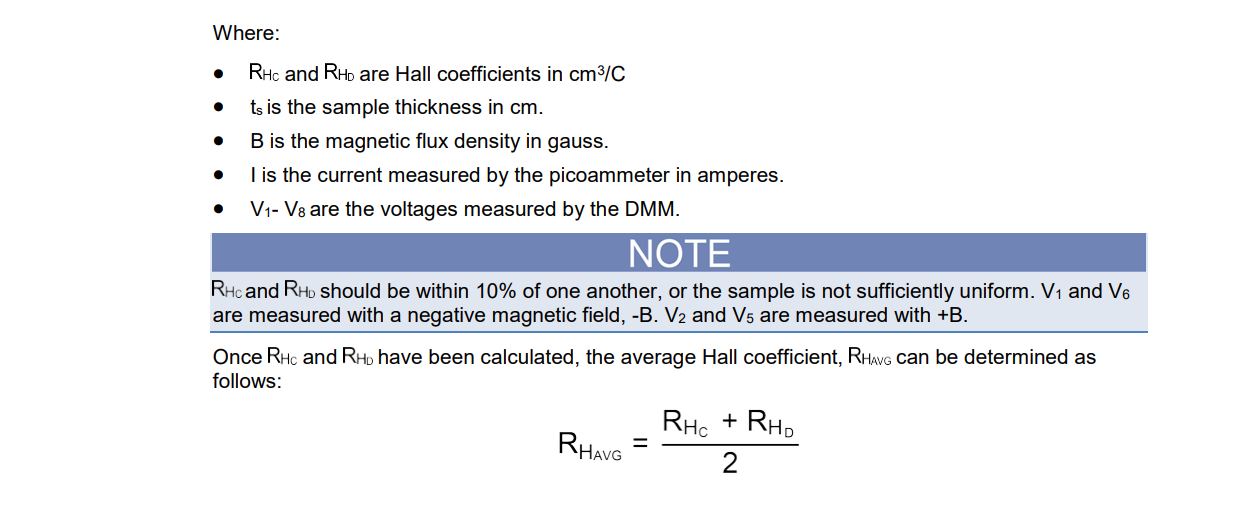

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [17]:
data_dec['RHc'] = (-data_dec['V2'] + data_dec['V1'] - data_dec['V5'] + data_dec['V6'])/(data_dec['I']*data_dec['multiplier'])
data_dec['RHd'] = (-data_dec['V4'] + data_dec['V3'] - data_dec['V7'] + data_dec['V8'])/(data_dec['I']*data_dec['multiplier'])
data_dec['R'] = (data_dec['RHc'] + data_dec['RHd'])/2

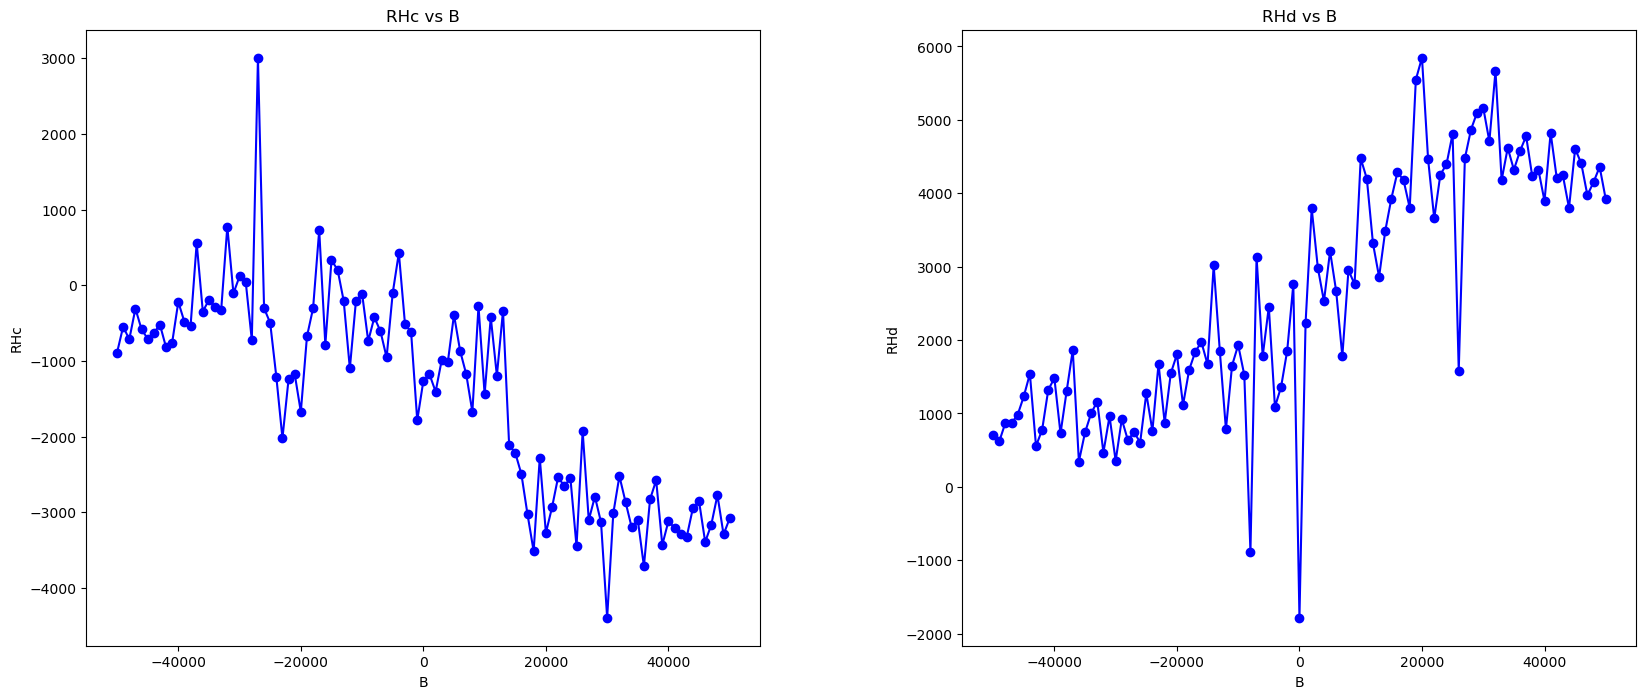

In [18]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data_dec['B'],data_dec['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data_dec['B'],data_dec['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

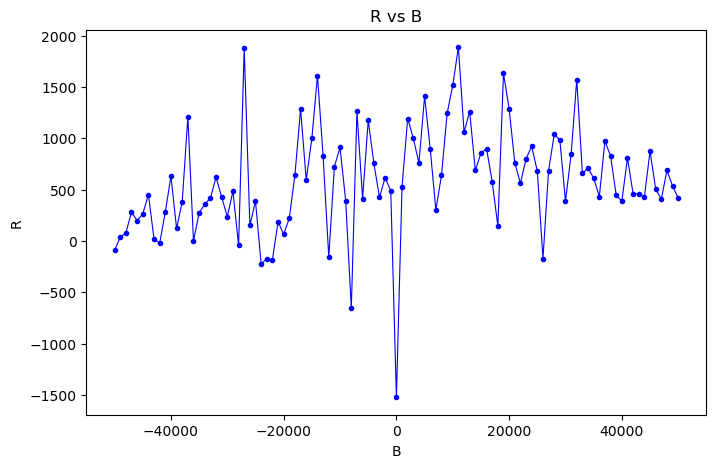

In [19]:
plt.figure(figsize=(8,5))
plt.plot(data_dec['B'],data_dec['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [20]:
data_inc = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data_inc = data_inc[data_inc['B_int_x'] == -1*data_inc['B_int_y']] # selecting 
data_inc = data_inc[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_inc.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data_inc.reset_index(inplace = True, drop = True) # resetting index
data_inc.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.000001,-50000,149.997459,110434.24426,-156668.05962,-130063.71652,143625.31212,107271.75620,-156750.75336,-126995.39915,142776.33971,1000000.0
1,0.000001,-49000,149.995986,111168.29427,-157663.18914,-131137.74133,146942.41290,108032.27122,-157506.76695,-127616.95219,146104.13733,1000000.0
2,0.000001,-48000,149.997627,111985.61538,-158634.14146,-132220.85719,149095.36534,109037.16741,-158809.46445,-128388.76961,148777.91150,1000000.0
3,0.000001,-47000,149.999207,112871.09687,-159642.91458,-132744.61767,149878.42310,109754.66994,-159596.79825,-128646.11810,150003.50895,1000000.0
4,0.000001,-46000,149.998082,113745.79701,-160694.56030,-132596.05953,151027.12976,110648.72861,-160399.07651,-128431.57117,150785.28588,1000000.0


### Hall resistance calculation

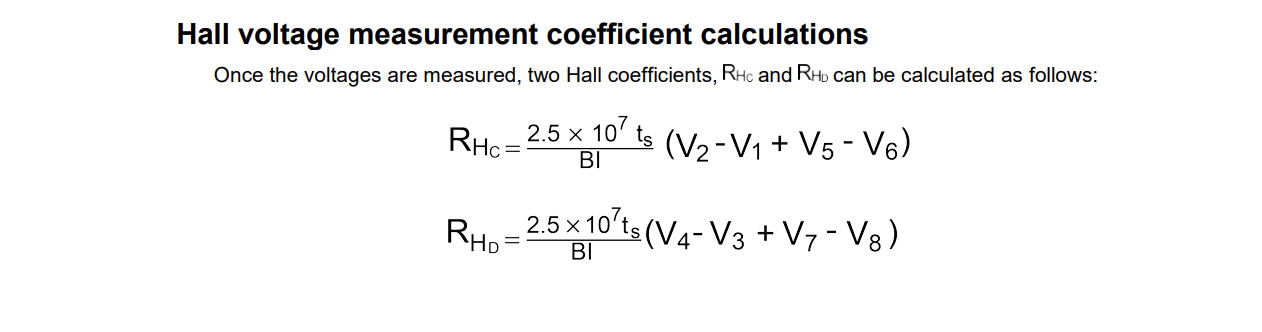

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [21]:
data_inc['RHc'] = (-data_inc['V2'] + data_inc['V1'] - data_inc['V5'] + data_inc['V6'])/(data_inc['I']*data_inc['multiplier'])
data_inc['RHd'] = (-data_inc['V4'] + data_inc['V3'] - data_inc['V7'] + data_inc['V8'])/(data_inc['I']*data_inc['multiplier'])

data_inc['R'] = (data_inc['RHc'] + data_inc['RHd'])/2

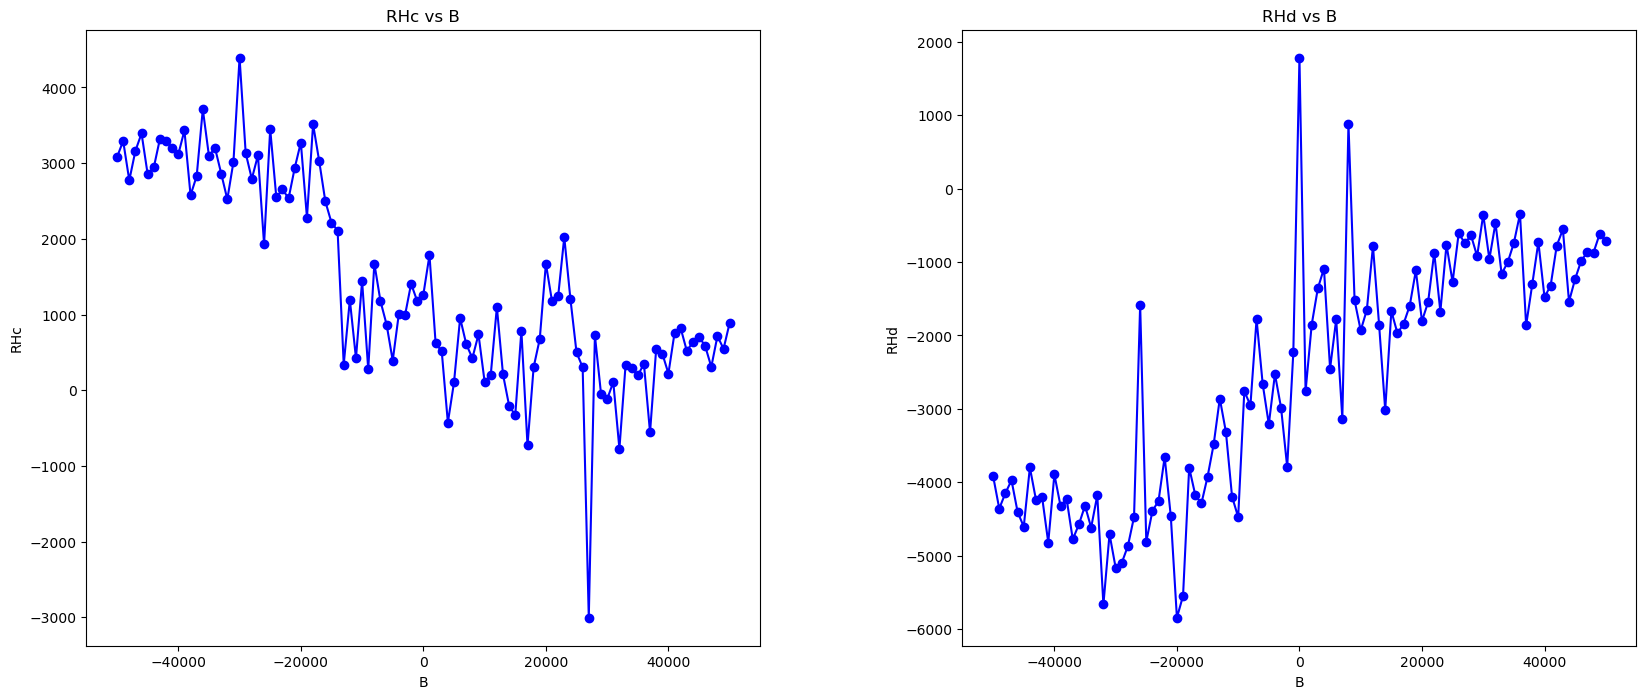

In [22]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data_inc['B'],data_inc['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data_inc['B'],data_inc['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

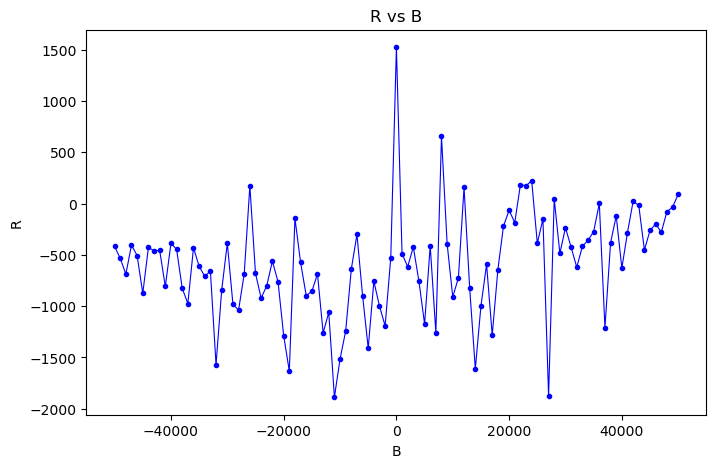

In [23]:
plt.figure(figsize=(8,5))
plt.plot(data_inc['B'],data_inc['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

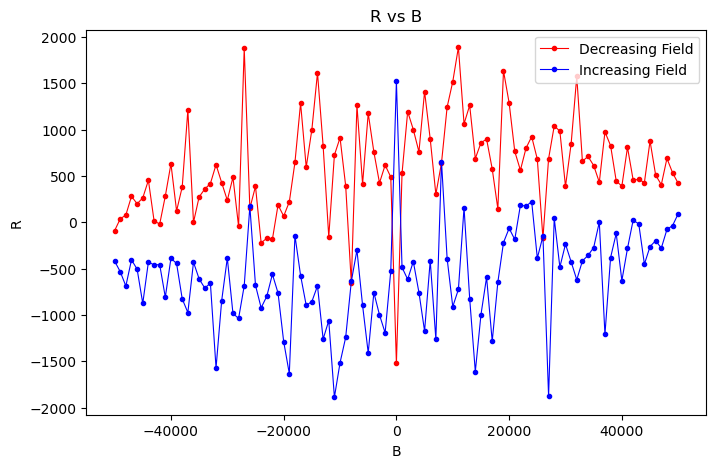

In [24]:
plt.figure(figsize=(8,5))
plt.plot(data_dec['B'], data_dec['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data_inc['B'],data_inc['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()